In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# data
dermatology = fetch_ucirepo(name = "dermatology") 

X = dermatology.data.features
y = dermatology.data.targets

df = pd.DataFrame(X)

In [3]:
# remove missing data
df_all = pd.merge(X, y, left_index=True, right_index=True)
df_cleaned_age = df_all.dropna(subset=['age'])

print(df_cleaned_age.columns)
print(f"Number of rows before: {len(df)}")
print(f"Number of rows after: {len(df_cleaned_age)}")

Index(['erythema', 'scaling', 'definite-borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral-mucosal involvement', 'knee elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'pnl infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of the basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear infiltrate',
       'band-like infiltrate', 'age', 'class'],
      dtype='object')
Number of rows before: 366
Number of rows 

In [4]:
# address class imbalance - SVM
W = df_cleaned_age 
z = df_cleaned_age['class']
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(W, z, test_size=0.2, random_state=123)

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test_scaled)

c:\Users\Mandana\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [5]:
# log transformation of skewed features
skewed_features = [
    'koebner phenomenon', 'polygonal papules', 'follicular papules', 'oral-mucosal involvement',
    'knee elbow involvement', 'scalp involvement', 'family history', 'melanin incontinence',
    'eosinophils in the infiltrate', 'pnl infiltrate', 'fibrosis of the papillary dermis', 
    'hyperkeratosis', 'clubbing of the rete ridges', 'thinning of the suprapapillary epidermis', 
    'spongiform pustule', 'munro microabcess', 'focal hypergranulosis', 
    'disappearance of the granular layer', 'vacuolisation and damage of the basal layer',
    'saw-tooth appearance of retes', 'follicular horn plug', 'perifollicular parakeratosis',
    'band-like infiltrate'
]

for feature in skewed_features:
    if feature in df_cleaned_age.columns:  
        df_cleaned_age[feature] = np.log1p(df_cleaned_age[feature])

print("Skewness after transformation:\n", df_cleaned_age[skewed_features].skew())

Skewness after transformation:
 koebner phenomenon                             0.789805
polygonal papules                              1.660820
follicular papules                             3.139210
oral-mucosal involvement                       1.767519
knee elbow involvement                         0.986221
scalp involvement                              1.170309
family history                                 2.306738
melanin incontinence                           1.680756
eosinophils in the infiltrate                  2.654254
pnl infiltrate                                 0.876335
fibrosis of the papillary dermis               2.268345
hyperkeratosis                                 0.871264
clubbing of the rete ridges                    0.996351
thinning of the suprapapillary epidermis       1.020583
spongiform pustule                             1.883239
munro microabcess                              1.649804
focal hypergranulosis                          1.698379
disappearance of

C:\Users\Mandana\AppData\Local\Temp\ipykernel_11832\1259784051.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_age[feature] = np.log1p(df_cleaned_age[feature])


In [6]:
# standardize
X_cleaned = df_cleaned_age.drop(columns=['class'])  
y_cleaned = df_cleaned_age['class']  

print(X_cleaned.dtypes)  

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_cleaned), columns=X_cleaned.columns)

X_standardized['class'] = y_cleaned

print(X_standardized.head())

erythema                                         int64
scaling                                          int64
definite-borders                                 int64
itching                                          int64
koebner phenomenon                             float64
polygonal papules                              float64
follicular papules                             float64
oral-mucosal involvement                       float64
knee elbow involvement                         float64
scalp involvement                              float64
family history                                 float64
melanin incontinence                           float64
eosinophils in the infiltrate                  float64
pnl infiltrate                                 float64
fibrosis of the papillary dermis               float64
exocytosis                                       int64
acanthosis                                       int64
hyperkeratosis                                 float64
parakerato

In [7]:
# split data and train model (Decision Trees)
X_cleaned = df_cleaned_age.drop(columns=['class'])  
y_cleaned = df_cleaned_age['class']  

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_cleaned), columns=X_cleaned.columns)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_cleaned, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=123)
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [11]:
# model evaluation
# calculate precision, recall, and f1 score for each class individually
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

class_mapping = {
    1: 'psoriasis',
    2: 'seboreic dermatitis',
    3: 'lichen planus',
    4: 'pityriasis rosea',
    5: 'chronic dermatitis',
    6: 'pityriasis rubra pilaris'
}

unique_labels = np.unique(y_test)
print("Unique labels in y_test:", unique_labels)

class_names = [class_mapping[i] for i in unique_labels if i in class_mapping]

for i, class_name in enumerate(class_names):
    print(f'{class_name}:')
    print(f'  Precision: {precision[i]:.4f}')
    print(f'  Recall: {recall[i]:.4f}')
    print(f'  F1-score: {f1[i]:.4f}')
    print()

print(f'Overall Accuracy: {accuracy:.4f}')

Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        22
           2       1.00      0.93      0.96        14
           3       1.00      0.93      0.96        14
           4       0.89      1.00      0.94         8
           5       0.92      1.00      0.96        12
           6       0.50      0.50      0.50         2

    accuracy                           0.94        72
   macro avg       0.88      0.89      0.88        72
weighted avg       0.95      0.94      0.94        72

Unique labels in y_test: [1 2 3 4 5 6]
psoriasis:
  Precision: 0.9545
  Recall: 0.9545
  F1-score: 0.9545

seboreic dermatitis:
  Precision: 1.0000
  Recall: 0.9286
  F1-score: 0.9630

lichen planus:
  Precision: 1.0000
  Recall: 0.9286
  F1-score: 0.9630

pityriasis rosea:
  Precision: 0.8889
  Recall: 1.0000
  F1-score: 0.9412

chronic dermatitis:
  Precision: 0.9231
  Recall: 1.0000
  F1-score: 0.9600

pityrias

Confusion Matrix:
[[21  0  0  0  0  1]
 [ 0 13  0  1  0  0]
 [ 0  0 13  0  1  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 12  0]
 [ 1  0  0  0  0  1]]
Unique labels in y_test: [1 2 3 4 5 6]


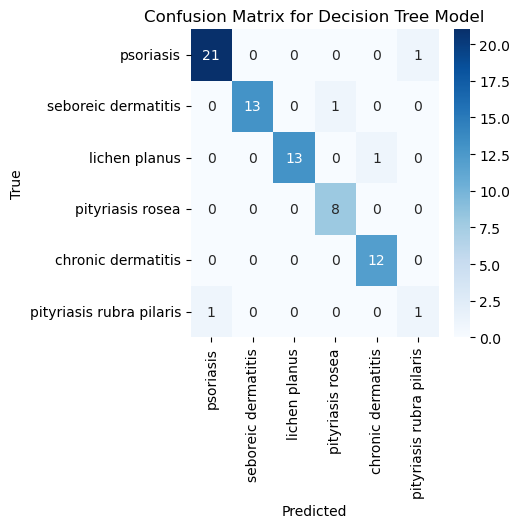

In [12]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

class_mapping = {
    1: 'psoriasis',
    2: 'seboreic dermatitis',
    3: 'lichen planus',
    4: 'pityriasis rosea',
    5: 'chronic dermatitis',
    6: 'pityriasis rubra pilaris'
}

unique_labels = np.unique(y_test)
print("Unique labels in y_test:", unique_labels)

class_names = [class_mapping[i] for i in unique_labels if i in class_mapping]

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
# k-fold cross-validation
X_cleaned = df_cleaned_age.drop(columns=['class'])  
y_cleaned = df_cleaned_age['class'] 

model = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123))

k = 5 
cv_scores = cross_val_score(model, X_cleaned, y_cleaned, cv=k, scoring='accuracy')

print(f'Cross-validation scores for each fold: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')
print(f'Standard deviation of cross-validation accuracy: {cv_scores.std():.4f}')

Cross-validation scores for each fold: [0.86111111 0.97222222 0.93055556 0.94366197 0.94366197]
Mean cross-validation accuracy: 0.9302
Standard deviation of cross-validation accuracy: 0.0372


In [14]:
# hyperparameter tuning - Grid Search CV
X_cleaned = df_cleaned_age.drop(columns=['class'])  
y_cleaned = df_cleaned_age['class']  

model = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=123))

param_grid = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],  
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],  
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]  
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_cleaned, y_cleaned)

print("Best hyperparameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

results = grid_search.cv_results_
print("\nAll grid search results:")
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print(f"Score: {mean_score:.4f} - Parameters: {params}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters found:  {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 10}
Best cross-validation accuracy: 0.9582

All grid search results:
Score: 0.9302 - Parameters: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Score: 0.9470 - Parameters: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 5}
Score: 0.9582 - Parameters: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 10}
Score: 0.9443 - Parameters: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__min_samples_split': 2}
Score: 0.9471 - Parameters: {'decis

In [15]:
# model evaluation (after hyperparameter tuning)
# calculate precision, recall, and f1 score for each class individually
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

class_mapping = {
    1: 'psoriasis',
    2: 'seboreic dermatitis',
    3: 'lichen planus',
    4: 'pityriasis rosea',
    5: 'chronic dermatitis',
    6: 'pityriasis rubra pilaris'
}

unique_labels = np.unique(y_test)
print("Unique labels in y_test:", unique_labels)

class_names = [class_mapping[i] for i in unique_labels if i in class_mapping]

for i, class_name in enumerate(class_names):
    print(f'{class_name}:')
    print(f'  Precision: {precision[i]:.4f}')
    print(f'  Recall: {recall[i]:.4f}')
    print(f'  F1-score: {f1[i]:.4f}')
    print()

print(f'Overall Accuracy: {accuracy:.4f}')

Accuracy: 0.9444
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        22
           2       1.00      0.93      0.96        14
           3       1.00      0.93      0.96        14
           4       0.89      1.00      0.94         8
           5       0.92      1.00      0.96        12
           6       0.50      0.50      0.50         2

    accuracy                           0.94        72
   macro avg       0.88      0.89      0.88        72
weighted avg       0.95      0.94      0.94        72

Unique labels in y_test: [1 2 3 4 5 6]
psoriasis:
  Precision: 0.9545
  Recall: 0.9545
  F1-score: 0.9545

seboreic dermatitis:
  Precision: 1.0000
  Recall: 0.9286
  F1-score: 0.9630

lichen planus:
  Precision: 1.0000
  Recall: 0.9286
  F1-score: 0.9630

pityriasis rosea:
  Precision: 0.8889
  Recall: 1.0000
  F1-score: 0.9412

chronic dermatitis:
  Precision: 0.9231
  Recall: 1.0000
  F1-score: 0.9600

pityrias

Confusion Matrix:
[[21  0  0  0  0  1]
 [ 0 13  0  1  0  0]
 [ 0  0 13  0  1  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 12  0]
 [ 1  0  0  0  0  1]]
Unique labels in y_test: [1 2 3 4 5 6]


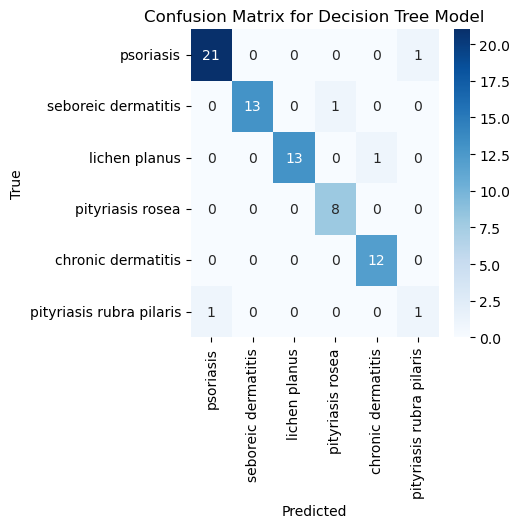

In [16]:
# confusion matrix (after hyperparameter tuning)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

class_mapping = {
    1: 'psoriasis',
    2: 'seboreic dermatitis',
    3: 'lichen planus',
    4: 'pityriasis rosea',
    5: 'chronic dermatitis',
    6: 'pityriasis rubra pilaris'
}

unique_labels = np.unique(y_test)
print("Unique labels in y_test:", unique_labels)

class_names = [class_mapping[i] for i in unique_labels if i in class_mapping]

plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

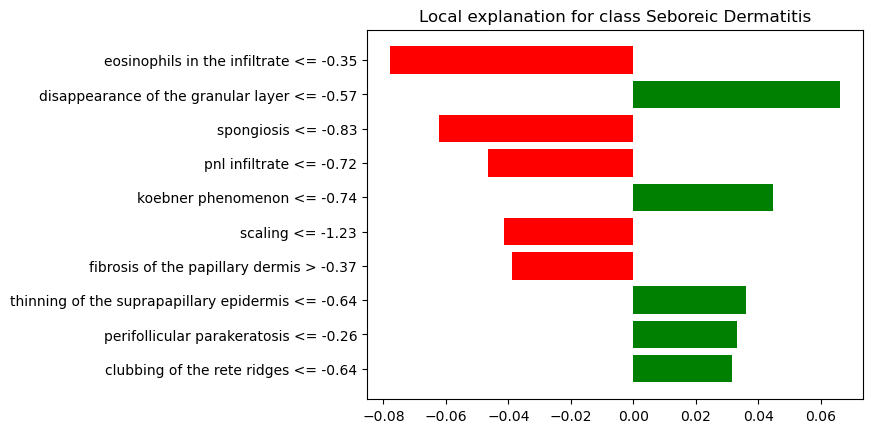

In [18]:
# LIME
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticRegression(max_iter=1000, random_state=123)
log_reg_model.fit(X_train_scaled, y_train)

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled, 
    training_labels=y_train, 
    feature_names=X_train.columns.tolist(),
    class_names=['Psoriasis', 'Seboreic Dermatitis', 'Lichen Planus', 'Pityriasis Rosea', 'Chronic Dermatitis', 'Pityriasis Rubra Pilaris'],
    mode='classification'
)

instance = X_test_scaled[0] 

explanation = explainer.explain_instance(instance, log_reg_model.predict_proba, num_features=10)

explanation.show_in_notebook(show_table=True, show_all=False)
explanation.as_pyplot_figure()
plt.show()


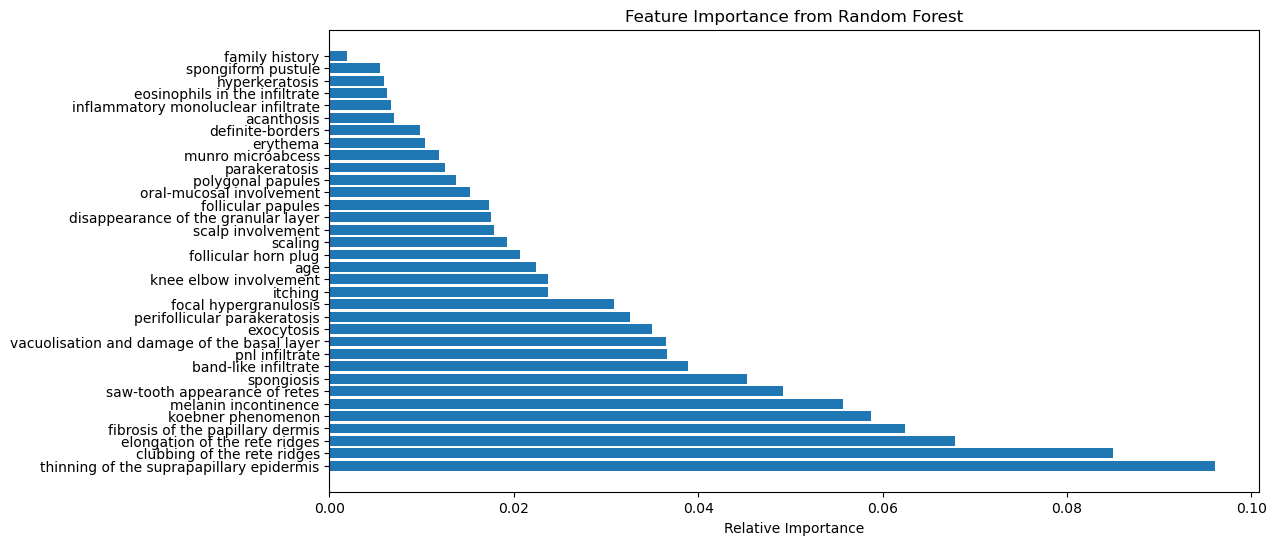

In [19]:
# analyze feature importance using radom forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

rf_model.fit(X_train, y_train)

feature_importances = rf_model.feature_importances_

indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importance from Random Forest')
plt.barh(range(X_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

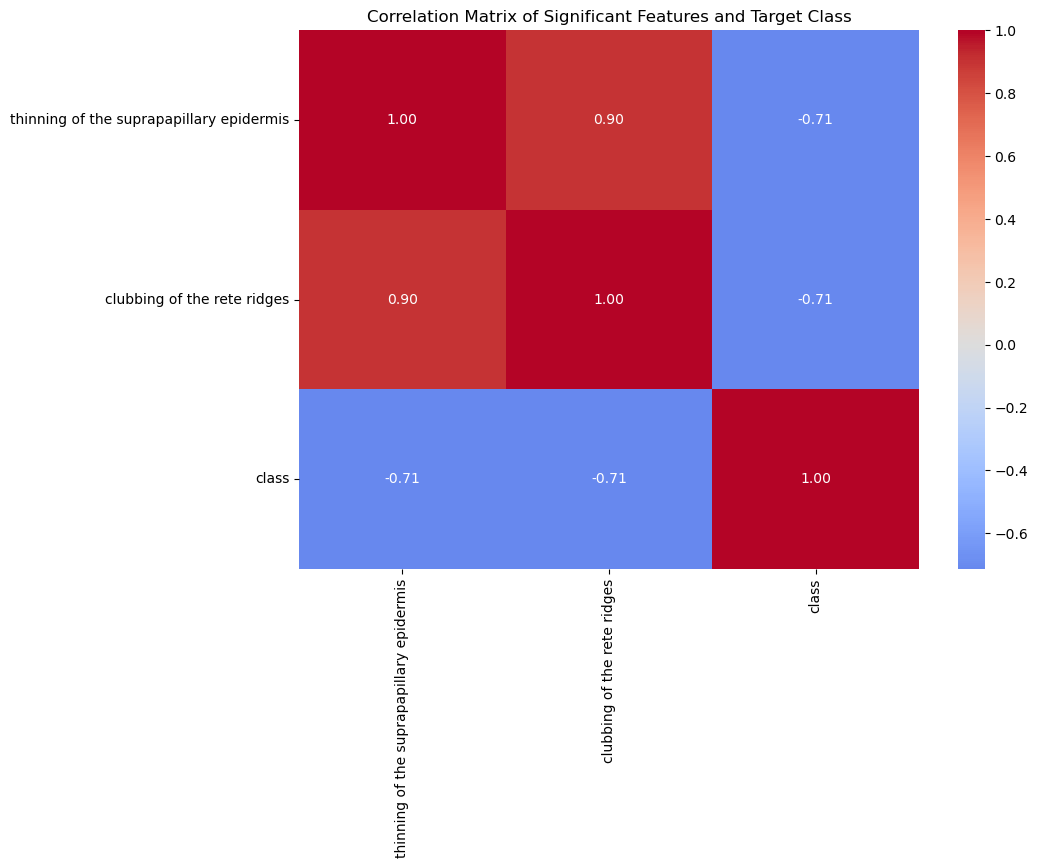

In [20]:
# Investigate the relationship between significant features and the target class
significant_features = ['thinning of the suprapapillary epidermis','clubbing of the rete ridges']
corr_matrix = pd.concat([X_train[significant_features], y_train], axis=1).corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix of Significant Features and Target Class')
plt.show()

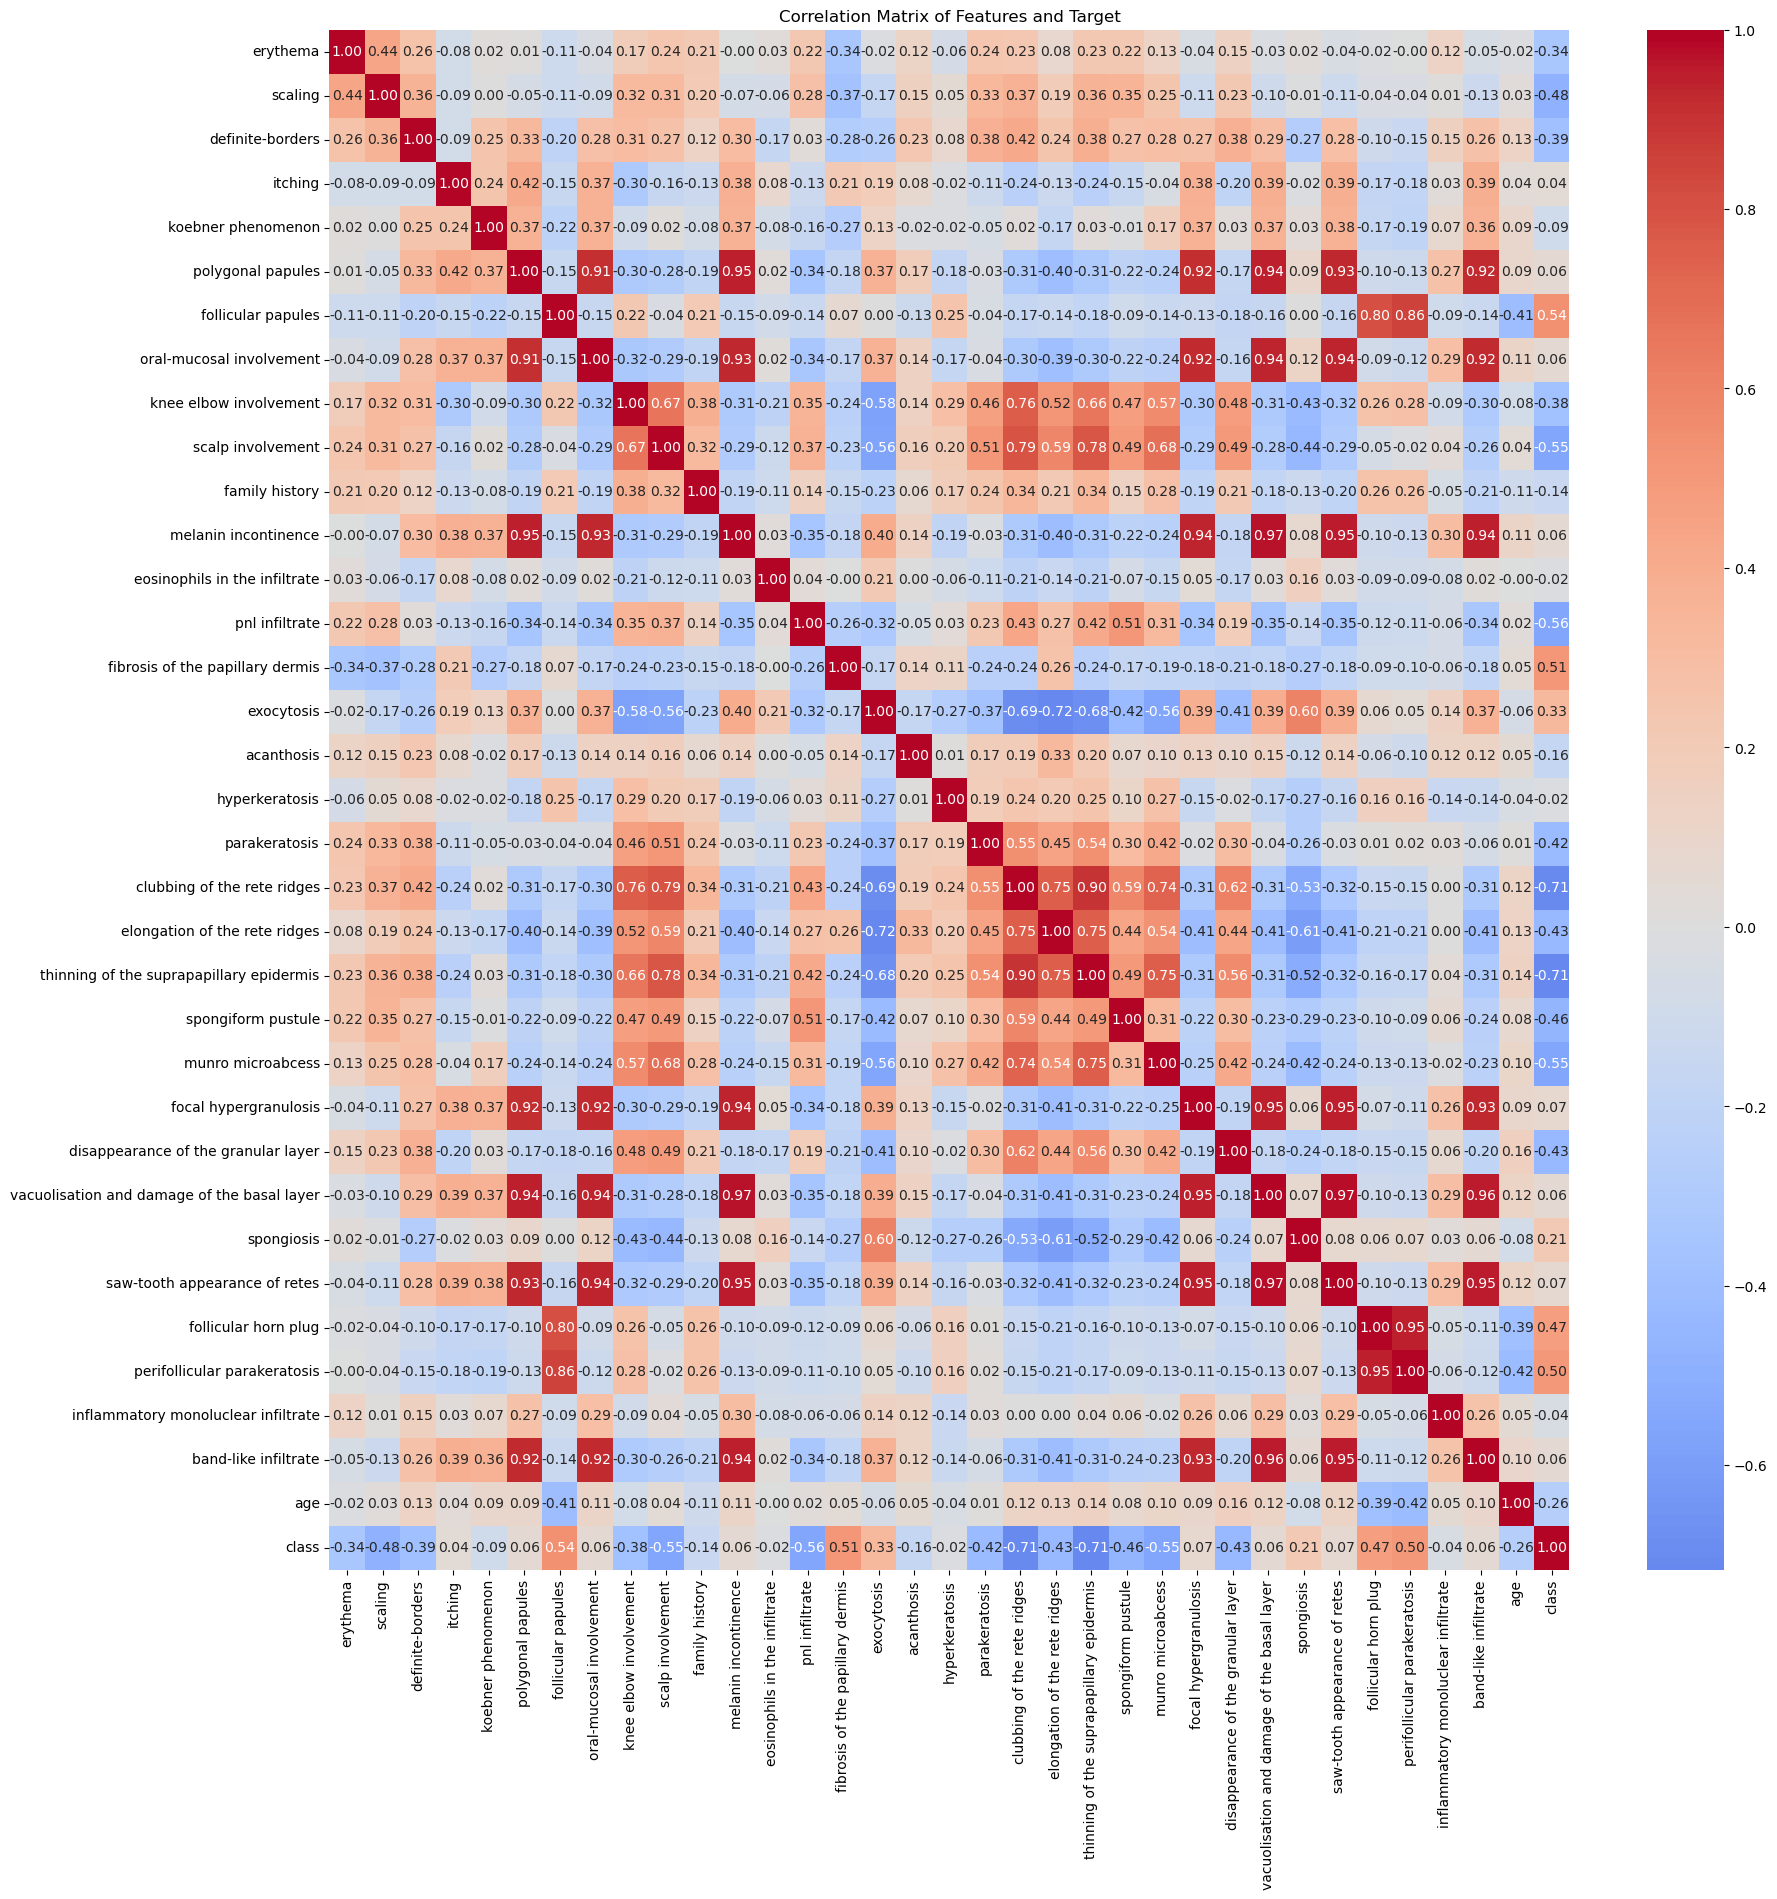

In [21]:
# investigate the relationship between features and target
X_y_combined = pd.concat([X_train, y_train], axis=1)
corr_matrix = X_y_combined.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix of Features and Target')
plt.show()